# Visualize your results

This notebook creates plots of the results you gathered while running experiments. The results for each evaluation method are stored in a pandas dataframe at 
`<experiment_timestamp>/<evaluation_method>/<evaluation_method>.csv`. The results are grouped by evaluation method, i.e. results for different datasets are stored in the same pandas dataframe of the corresponding evaluation method.

## How to use this notebook

1. Adapt the `result_folder` and `datasets` parameters according to the experiment you want to create a plot for.
2. There are three cells for each evaluation method. In the first cell the dataframe containing the results is loaded. In the next cell you can define which embedding methods you want to include in your plot. And in the last cell you can define the name which is displayed on the x-axis for each method. The order must be the same as in the `emds_to_include` list.
3. The plots are stored under `<experiment_timestamp>/<evaluation_method>` in `.svg` and `.png`.

In [17]:
import pickle
import sys
import time
import os
sys.path.insert(0, '../')
# visualization
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


# Parameters
datasets = ["cora","hvr","citeseer", "polblogs"]
datasets = ["citeseer"]
result_folder = '/nfs/students/winter-term-2019/project_5/ruetting/project-5/experiments/results/2020_01_28_17_41/'

# Link prediction

In [18]:
# Load and anaylze result dataframe
df = pd.read_csv(f'{result_folder}/link_prediction/link_prediction_results.csv')
embedding_methods = df["embedding_method"].unique()
datasets = df["dataset"].unique()
print(embedding_methods)

['Bernoulli_sigmoid_adjacency_64' 'Bernoulli_gaussian_adjacency_64'
 'Bernoulli_exponential_adjacency_64' 'Bernoulli_dist2_adjacency_64'
 'KL_64_softmax_ppr' 'KL_64_softmax_sum_power_tran'
 'KL_64_softmax_transition' 'Matrix_Fatorization_adjacency_64'
 'Matrix_Fatorization_laplacian_64' 'Matrix_Fatorization_transition_64'
 'Matrix_Fatorization_sym_normalized_laplacian_64'
 'Matrix_Fatorization_NetMF_64' 'Matrix_Fatorization_ppr_64'
 'Matrix_Fatorization_sum_power_tran_64']


In [19]:
# Define which embedding methods you want to include in your plots
embs_to_include = [
    'Bernoulli_sigmoid_adjacency_64',
    'Bernoulli_gaussian_adjacency_64',
    'Bernoulli_exponential_adjacency_64',
    'Bernoulli_dist2_adjacency_64',
    'KL_64_softmax_ppr',
    'KL_64_softmax_sum_power_tran',
    'KL_64_softmax_transition',
    'Matrix_Fatorization_adjacency_64',
    'Matrix_Fatorization_laplacian_64',
    'Matrix_Fatorization_transition_64',
    'Matrix_Fatorization_sym_normalized_laplacian_64',
    'Matrix_Fatorization_NetMF_64',
    'Matrix_Fatorization_ppr_64',
    'Matrix_Fatorization_sum_power_tran_64']

df = df.loc[df['embedding_method'].isin(embs_to_include)]

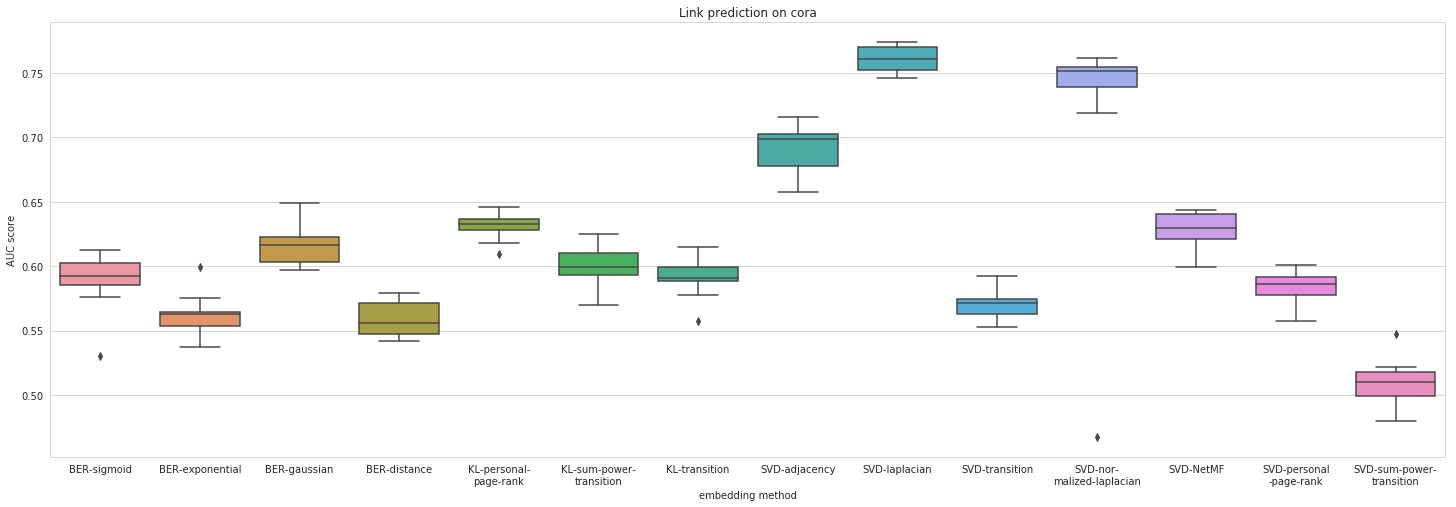

In [20]:
# Define x-axis names and create plots
x_axis_names = ['BER-sigmoid','BER-gaussian','BER-exponential','BER-distance',
            'KL-personal-\npage-rank','KL-sum-power-\ntransition','KL-transition',
            'SVD-adjacency','SVD-laplacian','SVD-transition','SVD-nor-\nmalized-laplacian','SVD-NetMF','SVD-personal\n-page-rank', 'SVD-sum-power-\ntransition']

for dataset in datasets:
    plot_data = []
    for emb_method in embs_to_include:
        plot_data.append(df.loc[(df["dataset"] == dataset) & (df["embedding_method"] == emb_method), "auc_score"].values)
    output_path_svg = f'{result_folder}/link_prediction/link_prediction_{dataset}.svg'
    output_path_png = f'{result_folder}/link_prediction/link_prediction_{dataset}.png'
    plt.figure(figsize=(25, 8))
    sns_plot = sns.boxplot(x=x_axis_names, y=plot_data);
    plt.title(f'Link prediction on {dataset}')
    plt.xlabel("embedding method")
    plt.ylabel("AUC score")
    plt.show()
    sns_plot.figure.savefig(output_path_svg)
    sns_plot.figure.savefig(output_path_png)

# Node classification

In [2]:
# Load and anaylze result dataframe
df = pd.read_csv(f'{result_folder}/node_classification/node_classification_results.csv')
embedding_methods = df["embedding_method"].unique()
datasets = df["dataset"].unique()
print(embedding_methods)

['Bernoulli_sigmoid_adjacency_64' 'Bernoulli_gaussian_adjacency_64'
 'Bernoulli_exponential_adjacency_64' 'Bernoulli_dist2_adjacency_64'
 'KL_64_softmax_ppr' 'KL_64_softmax_sum_power_tran'
 'KL_64_softmax_transition' 'Matrix_Fatorization_adjacency_64'
 'Matrix_Fatorization_laplacian_64' 'Matrix_Fatorization_transition_64'
 'Matrix_Fatorization_sym_normalized_laplacian_64'
 'Matrix_Fatorization_NetMF_64' 'Matrix_Fatorization_ppr_64'
 'Matrix_Fatorization_sum_power_tran_64']


In [5]:
# Define which embedding methods you want to include in your plots
embs_to_include = [
    'Bernoulli_sigmoid_adjacency_64',
    'Bernoulli_gaussian_adjacency_64',
    'Bernoulli_exponential_adjacency_64',
    'Bernoulli_dist2_adjacency_64',
    'KL_64_softmax_ppr',
    'KL_64_softmax_sum_power_tran',
    'KL_64_softmax_transition',
    'Matrix_Fatorization_adjacency_64',
    'Matrix_Fatorization_laplacian_64',
    'Matrix_Fatorization_transition_64',
    'Matrix_Fatorization_sym_normalized_laplacian_64',
    'Matrix_Fatorization_NetMF_64',
    'Matrix_Fatorization_ppr_64',
    'Matrix_Fatorization_sum_power_tran_64']

df = df.loc[df['embedding_method'].isin(embs_to_include)]

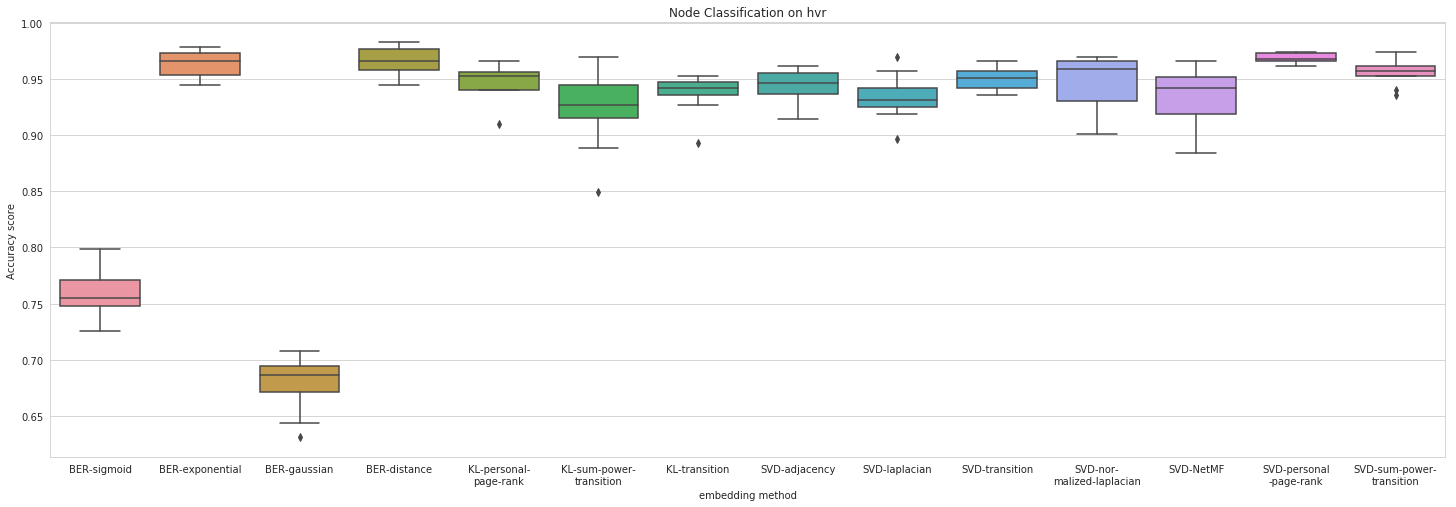

In [6]:
# Define x-axis names and create plots
x_axis_names = ['BER-sigmoid','BER-gaussian','BER-exponential','BER-distance',
            'KL-personal-\npage-rank','KL-sum-power-\ntransition','KL-transition',
            'SVD-adjacency','SVD-laplacian','SVD-transition','SVD-nor-\nmalized-laplacian','SVD-NetMF','SVD-personal\n-page-rank', 'SVD-sum-power-\ntransition']

for dataset in datasets:
    plot_data = []
    for emb_method in embs_to_include:
        plot_data.append(df.loc[(df["dataset"] == dataset) & (df["embedding_method"] == emb_method), "acc_score"].values)
    output_path_svg = f'{result_folder}/node_classification/node_classification_{dataset}.svg'
    output_path_png = f'{result_folder}/node_classification/node_classification_{dataset}.png'
    plt.figure(figsize=(25, 8))
    sns_plot = sns.boxplot(x=x_axis_names, y=plot_data);
    plt.title(f'Node Classification on {dataset}')
    plt.xlabel("embedding method")
    plt.ylabel("Accuracy score")
    plt.show()
    sns_plot.figure.savefig(output_path_svg)
    sns_plot.figure.savefig(output_path_png)

# Node clustering

In [14]:
# Load and anaylze result dataframe
df = pd.read_csv(f'{result_folder}/node_clustering/node_clustering_results.csv')
embedding_methods = df["embedding_method"].unique()
datasets = df["dataset"].unique()
print(embedding_methods)

['Bernoulli_sigmoid_adjacency_64' 'Bernoulli_gaussian_adjacency_64'
 'Bernoulli_exponential_adjacency_64' 'Bernoulli_dist2_adjacency_64'
 'KL_64_softmax_ppr' 'KL_64_softmax_sum_power_tran'
 'KL_64_softmax_transition' 'Matrix_Fatorization_adjacency_64'
 'Matrix_Fatorization_laplacian_64' 'Matrix_Fatorization_transition_64'
 'Matrix_Fatorization_sym_normalized_laplacian_64'
 'Matrix_Fatorization_NetMF_64' 'Matrix_Fatorization_ppr_64'
 'Matrix_Fatorization_sum_power_tran_64']


In [15]:
# Define which embedding methods you want to include in your plots
embs_to_include = [
    'Bernoulli_sigmoid_adjacency_64',
    'Bernoulli_gaussian_adjacency_64',
    'Bernoulli_exponential_adjacency_64',
    'Bernoulli_dist2_adjacency_64',
    'KL_64_softmax_ppr',
    'KL_64_softmax_sum_power_tran',
    'KL_64_softmax_transition',
    'Matrix_Fatorization_adjacency_64',
    'Matrix_Fatorization_laplacian_64',
    'Matrix_Fatorization_transition_64',
    'Matrix_Fatorization_sym_normalized_laplacian_64',
    'Matrix_Fatorization_NetMF_64',
    'Matrix_Fatorization_ppr_64',
    'Matrix_Fatorization_sum_power_tran_64']

df = df.loc[df['embedding_method'].isin(embs_to_include)]

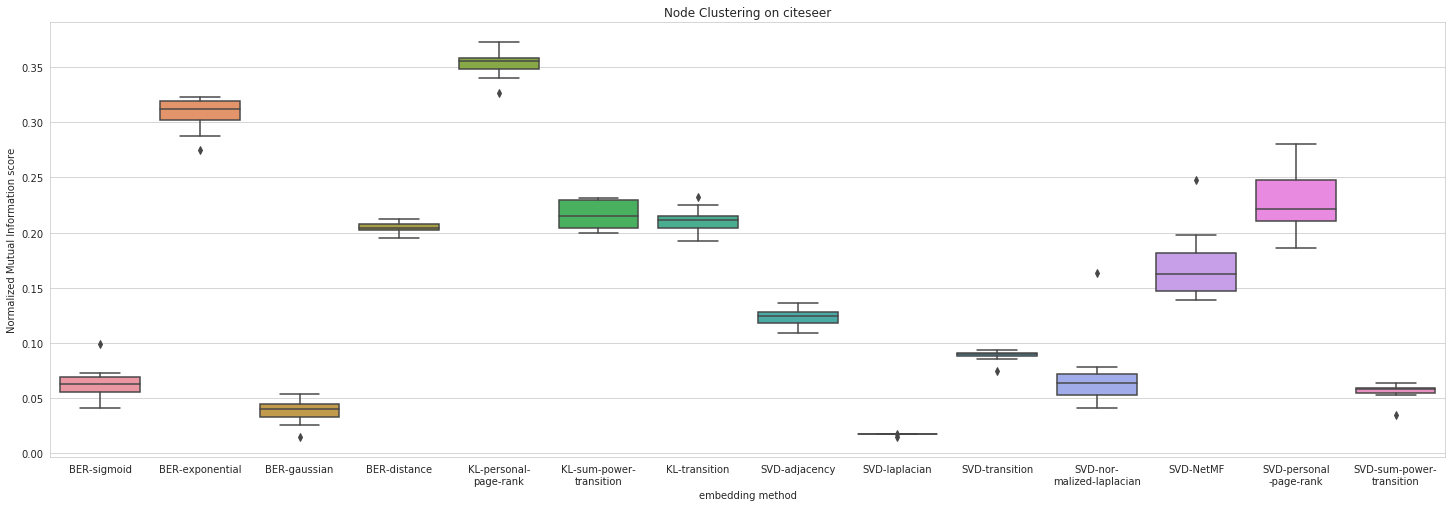

In [16]:
# Define x-axis names and create plots
x_axis_names = ['BER-sigmoid','BER-gaussian','BER-exponential','BER-distance',
            'KL-personal-\npage-rank','KL-sum-power-\ntransition','KL-transition',
            'SVD-adjacency','SVD-laplacian','SVD-transition','SVD-nor-\nmalized-laplacian','SVD-NetMF','SVD-personal-\npage-rank', 'SVD-sum-power-\ntransition']

for dataset in datasets:
    plot_data = []
    for emb_method in embs_to_include:
        plot_data.append(df.loc[(df["dataset"] == dataset) & (df["embedding_method"] == emb_method), "nmi_score"].values)
    output_path_svg = f'{result_folder}/node_clustering/node_clustering_{dataset}.svg'
    output_path_png = f'{result_folder}/node_clustering/node_clustering_{dataset}.png'
    plt.figure(figsize=(25, 8))
    sns_plot = sns.boxplot(x=x_axis_names, y=plot_data);
    plt.title(f'Node Clustering on {dataset}')
    plt.xlabel("embedding method")
    plt.ylabel("Normalized Mutual Information score")
    plt.show()
    sns_plot.figure.savefig(output_path_svg)
    sns_plot.figure.savefig(output_path_png)